In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.datasets import load_breast_cancer

In [127]:
class LinearSVM:
    def __init__(self, C):
        self.C = C
    
    def loss(self, y, y_cap):
        hinge_loss_params = 1-y*y_cap
        hinge_loss = np.sum(np.where(hinge_loss_params<0, 0, hinge_loss_params)) / len(y)
        regularization_loss = sum(self.W**2)/2
        return self.C * hinge_loss + regularization_loss
    
    def compute_gradients(self, X, Y, Y_cap, n):
        # differentiation of [1/2 * W**2 + C * (1-y*(W*X+b))]
        
        dW = (-self.C * np.multiply(Y, X.T).T + self.W).T
        for i in range(self.W.shape[0]):
            dW[i] = np.where(1-Y_cap <= 0, self.W[i], dW[i])
        dW = np.sum(dW, axis=1)
        dW = dW/n
        
        db = -Y * self.b
        db = np.where(1-Y_cap <= 0, 0, db)
        db = sum(db)
        db = db / n
        
        return dW, db
    
    def train(self, X, Y, epochs, lr):
        n_instances = X.shape[0]
        n_features = X.shape[1]
        
        # TODO: Should maybe try random initialization and check performance...
        self.W = np.zeros(n_features)
        # TODO: Initializing this to random doesnt generate decision boundary for circles... Why?
        self.b = 0.0
        
        for epoch in range(epochs):
            y_cap = np.dot(X,self.W) + self.b
            loss = self.loss(Y, y_cap)
            print("Epoch No: " + str(epoch) + ", Loss: " + str(loss))
            dW, db = self.compute_gradients(X, Y, y_cap, n_instances)
            self.W -= lr * dW
            self.b -= lr * db
    
    def predict(self, X):
        return np.where(np.dot(X, self.W) + self.b > 0, 1, -1)
    
    def evaluate(self, X, Y):
        y_cap = self.predict(X)
        acc = len(np.where(y_cap == Y)[0]) / len(Y)
        return acc

In [128]:
# Q. 3.2 
X = np.vstack((np.random.multivariate_normal([2.5, 0.0], np.identity(2), 750), np.random.multivariate_normal([-2.5, 0.0], np.identity(2), 750)))
Y = np.concatenate((np.full((750), -1), np.ones(750)))

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=250, random_state=1)

In [130]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=250, random_state=1)

In [131]:
svm = LinearSVM(C=1)
svm.train(X_train, Y_train, epochs=1000, lr=0.001)

Epoch No: 0, Loss: 1.0
Epoch No: 1, Loss: 0.9940717195051636
Epoch No: 2, Loss: 0.9881552896430364
Epoch No: 3, Loss: 0.9822506867242037
Epoch No: 4, Loss: 0.9763578871066059
Epoch No: 5, Loss: 0.9704768671954432
Epoch No: 6, Loss: 0.9646076034430834
Epoch No: 7, Loss: 0.9587500723489643
Epoch No: 8, Loss: 0.9529042504595023
Epoch No: 9, Loss: 0.9470701143679976
Epoch No: 10, Loss: 0.9412476407145396
Epoch No: 11, Loss: 0.9354368061859148
Epoch No: 12, Loss: 0.929637587515513
Epoch No: 13, Loss: 0.9238499614832331
Epoch No: 14, Loss: 0.9180739049153919
Epoch No: 15, Loss: 0.9123093946846295
Epoch No: 16, Loss: 0.9065564077098186
Epoch No: 17, Loss: 0.9008149209559705
Epoch No: 18, Loss: 0.8950849114341433
Epoch No: 19, Loss: 0.88936635620135
Epoch No: 20, Loss: 0.8836592323604671
Epoch No: 21, Loss: 0.8779635170601422
Epoch No: 22, Loss: 0.8722791874947027
Epoch No: 23, Loss: 0.8666062209040644
Epoch No: 24, Loss: 0.8609445945736409
Epoch No: 25, Loss: 0.8552942858342518
Epoch No: 26, 

Epoch No: 643, Loss: 0.33233181309298016
Epoch No: 644, Loss: 0.33265687257282783
Epoch No: 645, Loss: 0.3329818894792786
Epoch No: 646, Loss: 0.3333068632902162
Epoch No: 647, Loss: 0.3336321285938603
Epoch No: 648, Loss: 0.33395689581339183
Epoch No: 649, Loss: 0.3342817653464625
Epoch No: 650, Loss: 0.33460724332271097
Epoch No: 651, Loss: 0.3349323219876921
Epoch No: 652, Loss: 0.335257349889146
Epoch No: 653, Loss: 0.33558232652948017
Epoch No: 654, Loss: 0.33590728437185474
Epoch No: 655, Loss: 0.33623202366726873
Epoch No: 656, Loss: 0.33655670895337747
Epoch No: 657, Loss: 0.33688167640129585
Epoch No: 658, Loss: 0.3372065522049614
Epoch No: 659, Loss: 0.33753106457120424
Epoch No: 660, Loss: 0.3378565247000221
Epoch No: 661, Loss: 0.3381826546929153
Epoch No: 662, Loss: 0.33850791939555547
Epoch No: 663, Loss: 0.33883312167784296
Epoch No: 664, Loss: 0.33915826107677216
Epoch No: 665, Loss: 0.339483337130851
Epoch No: 666, Loss: 0.33980834938009674
Epoch No: 667, Loss: 0.34013

In [132]:
# Linear SVM
# epochs = 1000, lr = 0.001, Softness hyperparam C = 1
# Test Accuracy: 99.6%
svm.evaluate(X_test, Y_test)

0.996

In [133]:
def decision_boundary(model, X, Y):
    X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    XX, YY = np.meshgrid(np.arange(X1_min, X1_max, 0.02), np.arange(X2_min, X2_max, 0.02))

    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.scatter(X[np.where(Y==-1)[0], 0], X[np.where(Y==-1)[0], 1], label='-1')
    plt.scatter(X[np.where(Y==1)[0], 0], X[np.where(Y==1)[0], 1], label='1')
    plt.contour(XX, YY, Z, cmap=plt.cm.Paired)
    plt.legend()
    plt.show()

[ 1  1  1 ... -1 -1 -1]


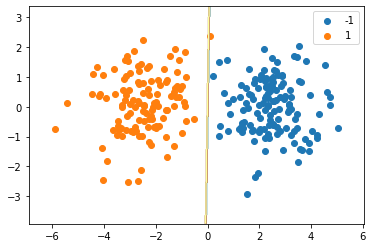

In [134]:
decision_boundary(svm, X_test, Y_test)

In [ ]:
# Q. 3.3

In [135]:
X, Y = make_circles(1500)
Y[np.where(Y==0)] = -1

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=250, random_state=1)

In [137]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=250, random_state=1)

In [138]:
svm = LinearSVM(C=1)
svm.train(X_train, Y_train, epochs=10000, lr=0.01)

Epoch No: 0, Loss: 1.0
Epoch No: 1, Loss: 0.9999990034426626
Epoch No: 2, Loss: 0.9999980267168159
Epoch No: 3, Loss: 0.9999970694278139
Epoch No: 4, Loss: 0.999996131188863
Epoch No: 5, Loss: 0.999995211620867
Epoch No: 6, Loss: 0.9999943103522744
Epoch No: 7, Loss: 0.9999934270189265
Epoch No: 8, Loss: 0.9999925612639124
Epoch No: 9, Loss: 0.999991712737423
Epoch No: 10, Loss: 0.9999908810966109
Epoch No: 11, Loss: 0.9999900660054508
Epoch No: 12, Loss: 0.9999892671346048
Epoch No: 13, Loss: 0.9999884841612888
Epoch No: 14, Loss: 0.9999877167691417
Epoch No: 15, Loss: 0.9999869646480981
Epoch No: 16, Loss: 0.9999862274942635
Epoch No: 17, Loss: 0.9999855050097902
Epoch No: 18, Loss: 0.9999847969027579
Epoch No: 19, Loss: 0.9999841028870555
Epoch No: 20, Loss: 0.9999834226822657
Epoch No: 21, Loss: 0.9999827560135511
Epoch No: 22, Loss: 0.9999821026115439
Epoch No: 23, Loss: 0.9999814622122366
Epoch No: 24, Loss: 0.9999808345568756
Epoch No: 25, Loss: 0.9999802193918563
Epoch No: 26, 

Epoch No: 635, Loss: 0.9999499218851678
Epoch No: 636, Loss: 0.9999499218823154
Epoch No: 637, Loss: 0.9999499218795199
Epoch No: 638, Loss: 0.9999499218767798
Epoch No: 639, Loss: 0.9999499218740945
Epoch No: 640, Loss: 0.9999499218714625
Epoch No: 641, Loss: 0.9999499218688829
Epoch No: 642, Loss: 0.9999499218663546
Epoch No: 643, Loss: 0.9999499218638767
Epoch No: 644, Loss: 0.9999499218614479
Epoch No: 645, Loss: 0.9999499218590676
Epoch No: 646, Loss: 0.9999499218567348
Epoch No: 647, Loss: 0.9999499218544483
Epoch No: 648, Loss: 0.9999499218522072
Epoch No: 649, Loss: 0.999949921850011
Epoch No: 650, Loss: 0.9999499218478581
Epoch No: 651, Loss: 0.9999499218457483
Epoch No: 652, Loss: 0.9999499218436804
Epoch No: 653, Loss: 0.9999499218416538
Epoch No: 654, Loss: 0.9999499218396674
Epoch No: 655, Loss: 0.9999499218377205
Epoch No: 656, Loss: 0.9999499218358124
Epoch No: 657, Loss: 0.999949921833942
Epoch No: 658, Loss: 0.9999499218321091
Epoch No: 659, Loss: 0.9999499218303127
Ep

Epoch No: 1351, Loss: 0.9999499217418347
Epoch No: 1352, Loss: 0.9999499217418348
Epoch No: 1353, Loss: 0.9999499217418346
Epoch No: 1354, Loss: 0.9999499217418346
Epoch No: 1355, Loss: 0.9999499217418347
Epoch No: 1356, Loss: 0.9999499217418347
Epoch No: 1357, Loss: 0.9999499217418347
Epoch No: 1358, Loss: 0.9999499217418346
Epoch No: 1359, Loss: 0.9999499217418346
Epoch No: 1360, Loss: 0.9999499217418346
Epoch No: 1361, Loss: 0.9999499217418346
Epoch No: 1362, Loss: 0.9999499217418347
Epoch No: 1363, Loss: 0.9999499217418347
Epoch No: 1364, Loss: 0.9999499217418347
Epoch No: 1365, Loss: 0.9999499217418346
Epoch No: 1366, Loss: 0.9999499217418347
Epoch No: 1367, Loss: 0.9999499217418346
Epoch No: 1368, Loss: 0.9999499217418347
Epoch No: 1369, Loss: 0.9999499217418346
Epoch No: 1370, Loss: 0.9999499217418347
Epoch No: 1371, Loss: 0.9999499217418346
Epoch No: 1372, Loss: 0.9999499217418345
Epoch No: 1373, Loss: 0.9999499217418345
Epoch No: 1374, Loss: 0.9999499217418347
Epoch No: 1375, 

Epoch No: 2093, Loss: 0.9999499217418345
Epoch No: 2094, Loss: 0.9999499217418345
Epoch No: 2095, Loss: 0.9999499217418346
Epoch No: 2096, Loss: 0.9999499217418346
Epoch No: 2097, Loss: 0.9999499217418347
Epoch No: 2098, Loss: 0.9999499217418347
Epoch No: 2099, Loss: 0.9999499217418346
Epoch No: 2100, Loss: 0.9999499217418345
Epoch No: 2101, Loss: 0.9999499217418346
Epoch No: 2102, Loss: 0.9999499217418346
Epoch No: 2103, Loss: 0.9999499217418346
Epoch No: 2104, Loss: 0.9999499217418346
Epoch No: 2105, Loss: 0.9999499217418347
Epoch No: 2106, Loss: 0.9999499217418346
Epoch No: 2107, Loss: 0.9999499217418345
Epoch No: 2108, Loss: 0.9999499217418345
Epoch No: 2109, Loss: 0.9999499217418346
Epoch No: 2110, Loss: 0.9999499217418346
Epoch No: 2111, Loss: 0.9999499217418347
Epoch No: 2112, Loss: 0.9999499217418347
Epoch No: 2113, Loss: 0.9999499217418346
Epoch No: 2114, Loss: 0.9999499217418345
Epoch No: 2115, Loss: 0.9999499217418346
Epoch No: 2116, Loss: 0.9999499217418346
Epoch No: 2117, 

Epoch No: 2830, Loss: 0.9999499217418346
Epoch No: 2831, Loss: 0.9999499217418346
Epoch No: 2832, Loss: 0.9999499217418346
Epoch No: 2833, Loss: 0.9999499217418346
Epoch No: 2834, Loss: 0.9999499217418346
Epoch No: 2835, Loss: 0.9999499217418346
Epoch No: 2836, Loss: 0.9999499217418346
Epoch No: 2837, Loss: 0.9999499217418346
Epoch No: 2838, Loss: 0.9999499217418347
Epoch No: 2839, Loss: 0.9999499217418346
Epoch No: 2840, Loss: 0.9999499217418346
Epoch No: 2841, Loss: 0.9999499217418346
Epoch No: 2842, Loss: 0.9999499217418346
Epoch No: 2843, Loss: 0.9999499217418346
Epoch No: 2844, Loss: 0.9999499217418346
Epoch No: 2845, Loss: 0.9999499217418346
Epoch No: 2846, Loss: 0.9999499217418346
Epoch No: 2847, Loss: 0.9999499217418346
Epoch No: 2848, Loss: 0.9999499217418346
Epoch No: 2849, Loss: 0.9999499217418346
Epoch No: 2850, Loss: 0.9999499217418346
Epoch No: 2851, Loss: 0.9999499217418346
Epoch No: 2852, Loss: 0.9999499217418346
Epoch No: 2853, Loss: 0.9999499217418346
Epoch No: 2854, 

Epoch No: 3549, Loss: 0.9999499217418346
Epoch No: 3550, Loss: 0.9999499217418346
Epoch No: 3551, Loss: 0.9999499217418346
Epoch No: 3552, Loss: 0.9999499217418346
Epoch No: 3553, Loss: 0.9999499217418346
Epoch No: 3554, Loss: 0.9999499217418346
Epoch No: 3555, Loss: 0.9999499217418346
Epoch No: 3556, Loss: 0.9999499217418346
Epoch No: 3557, Loss: 0.9999499217418346
Epoch No: 3558, Loss: 0.9999499217418346
Epoch No: 3559, Loss: 0.9999499217418346
Epoch No: 3560, Loss: 0.9999499217418346
Epoch No: 3561, Loss: 0.9999499217418346
Epoch No: 3562, Loss: 0.9999499217418346
Epoch No: 3563, Loss: 0.9999499217418346
Epoch No: 3564, Loss: 0.9999499217418346
Epoch No: 3565, Loss: 0.9999499217418346
Epoch No: 3566, Loss: 0.9999499217418346
Epoch No: 3567, Loss: 0.9999499217418346
Epoch No: 3568, Loss: 0.9999499217418346
Epoch No: 3569, Loss: 0.9999499217418346
Epoch No: 3570, Loss: 0.9999499217418346
Epoch No: 3571, Loss: 0.9999499217418346
Epoch No: 3572, Loss: 0.9999499217418346
Epoch No: 3573, 

Epoch No: 4283, Loss: 0.9999499217418346
Epoch No: 4284, Loss: 0.9999499217418346
Epoch No: 4285, Loss: 0.9999499217418346
Epoch No: 4286, Loss: 0.9999499217418346
Epoch No: 4287, Loss: 0.9999499217418346
Epoch No: 4288, Loss: 0.9999499217418346
Epoch No: 4289, Loss: 0.9999499217418346
Epoch No: 4290, Loss: 0.9999499217418346
Epoch No: 4291, Loss: 0.9999499217418346
Epoch No: 4292, Loss: 0.9999499217418346
Epoch No: 4293, Loss: 0.9999499217418346
Epoch No: 4294, Loss: 0.9999499217418346
Epoch No: 4295, Loss: 0.9999499217418346
Epoch No: 4296, Loss: 0.9999499217418346
Epoch No: 4297, Loss: 0.9999499217418346
Epoch No: 4298, Loss: 0.9999499217418346
Epoch No: 4299, Loss: 0.9999499217418346
Epoch No: 4300, Loss: 0.9999499217418346
Epoch No: 4301, Loss: 0.9999499217418346
Epoch No: 4302, Loss: 0.9999499217418346
Epoch No: 4303, Loss: 0.9999499217418346
Epoch No: 4304, Loss: 0.9999499217418346
Epoch No: 4305, Loss: 0.9999499217418346
Epoch No: 4306, Loss: 0.9999499217418346
Epoch No: 4307, 

Epoch No: 5013, Loss: 0.9999499217418346
Epoch No: 5014, Loss: 0.9999499217418346
Epoch No: 5015, Loss: 0.9999499217418346
Epoch No: 5016, Loss: 0.9999499217418346
Epoch No: 5017, Loss: 0.9999499217418346
Epoch No: 5018, Loss: 0.9999499217418346
Epoch No: 5019, Loss: 0.9999499217418346
Epoch No: 5020, Loss: 0.9999499217418346
Epoch No: 5021, Loss: 0.9999499217418346
Epoch No: 5022, Loss: 0.9999499217418346
Epoch No: 5023, Loss: 0.9999499217418346
Epoch No: 5024, Loss: 0.9999499217418346
Epoch No: 5025, Loss: 0.9999499217418346
Epoch No: 5026, Loss: 0.9999499217418346
Epoch No: 5027, Loss: 0.9999499217418346
Epoch No: 5028, Loss: 0.9999499217418346
Epoch No: 5029, Loss: 0.9999499217418346
Epoch No: 5030, Loss: 0.9999499217418346
Epoch No: 5031, Loss: 0.9999499217418346
Epoch No: 5032, Loss: 0.9999499217418346
Epoch No: 5033, Loss: 0.9999499217418346
Epoch No: 5034, Loss: 0.9999499217418346
Epoch No: 5035, Loss: 0.9999499217418346
Epoch No: 5036, Loss: 0.9999499217418346
Epoch No: 5037, 

Epoch No: 5750, Loss: 0.9999499217418346
Epoch No: 5751, Loss: 0.9999499217418346
Epoch No: 5752, Loss: 0.9999499217418346
Epoch No: 5753, Loss: 0.9999499217418346
Epoch No: 5754, Loss: 0.9999499217418346
Epoch No: 5755, Loss: 0.9999499217418346
Epoch No: 5756, Loss: 0.9999499217418346
Epoch No: 5757, Loss: 0.9999499217418346
Epoch No: 5758, Loss: 0.9999499217418346
Epoch No: 5759, Loss: 0.9999499217418346
Epoch No: 5760, Loss: 0.9999499217418346
Epoch No: 5761, Loss: 0.9999499217418346
Epoch No: 5762, Loss: 0.9999499217418346
Epoch No: 5763, Loss: 0.9999499217418346
Epoch No: 5764, Loss: 0.9999499217418346
Epoch No: 5765, Loss: 0.9999499217418346
Epoch No: 5766, Loss: 0.9999499217418346
Epoch No: 5767, Loss: 0.9999499217418346
Epoch No: 5768, Loss: 0.9999499217418346
Epoch No: 5769, Loss: 0.9999499217418346
Epoch No: 5770, Loss: 0.9999499217418346
Epoch No: 5771, Loss: 0.9999499217418346
Epoch No: 5772, Loss: 0.9999499217418346
Epoch No: 5773, Loss: 0.9999499217418346
Epoch No: 5774, 

Epoch No: 6488, Loss: 0.9999499217418346
Epoch No: 6489, Loss: 0.9999499217418346
Epoch No: 6490, Loss: 0.9999499217418346
Epoch No: 6491, Loss: 0.9999499217418346
Epoch No: 6492, Loss: 0.9999499217418346
Epoch No: 6493, Loss: 0.9999499217418346
Epoch No: 6494, Loss: 0.9999499217418346
Epoch No: 6495, Loss: 0.9999499217418346
Epoch No: 6496, Loss: 0.9999499217418346
Epoch No: 6497, Loss: 0.9999499217418346
Epoch No: 6498, Loss: 0.9999499217418346
Epoch No: 6499, Loss: 0.9999499217418346
Epoch No: 6500, Loss: 0.9999499217418346
Epoch No: 6501, Loss: 0.9999499217418346
Epoch No: 6502, Loss: 0.9999499217418346
Epoch No: 6503, Loss: 0.9999499217418346
Epoch No: 6504, Loss: 0.9999499217418346
Epoch No: 6505, Loss: 0.9999499217418346
Epoch No: 6506, Loss: 0.9999499217418346
Epoch No: 6507, Loss: 0.9999499217418346
Epoch No: 6508, Loss: 0.9999499217418346
Epoch No: 6509, Loss: 0.9999499217418346
Epoch No: 6510, Loss: 0.9999499217418346
Epoch No: 6511, Loss: 0.9999499217418346
Epoch No: 6512, 

Epoch No: 7223, Loss: 0.9999499217418346
Epoch No: 7224, Loss: 0.9999499217418346
Epoch No: 7225, Loss: 0.9999499217418346
Epoch No: 7226, Loss: 0.9999499217418346
Epoch No: 7227, Loss: 0.9999499217418346
Epoch No: 7228, Loss: 0.9999499217418346
Epoch No: 7229, Loss: 0.9999499217418346
Epoch No: 7230, Loss: 0.9999499217418346
Epoch No: 7231, Loss: 0.9999499217418346
Epoch No: 7232, Loss: 0.9999499217418346
Epoch No: 7233, Loss: 0.9999499217418346
Epoch No: 7234, Loss: 0.9999499217418346
Epoch No: 7235, Loss: 0.9999499217418346
Epoch No: 7236, Loss: 0.9999499217418346
Epoch No: 7237, Loss: 0.9999499217418346
Epoch No: 7238, Loss: 0.9999499217418346
Epoch No: 7239, Loss: 0.9999499217418346
Epoch No: 7240, Loss: 0.9999499217418346
Epoch No: 7241, Loss: 0.9999499217418346
Epoch No: 7242, Loss: 0.9999499217418346
Epoch No: 7243, Loss: 0.9999499217418346
Epoch No: 7244, Loss: 0.9999499217418346
Epoch No: 7245, Loss: 0.9999499217418346
Epoch No: 7246, Loss: 0.9999499217418346
Epoch No: 7247, 

Epoch No: 7957, Loss: 0.9999499217418346
Epoch No: 7958, Loss: 0.9999499217418346
Epoch No: 7959, Loss: 0.9999499217418346
Epoch No: 7960, Loss: 0.9999499217418346
Epoch No: 7961, Loss: 0.9999499217418346
Epoch No: 7962, Loss: 0.9999499217418346
Epoch No: 7963, Loss: 0.9999499217418346
Epoch No: 7964, Loss: 0.9999499217418346
Epoch No: 7965, Loss: 0.9999499217418346
Epoch No: 7966, Loss: 0.9999499217418346
Epoch No: 7967, Loss: 0.9999499217418346
Epoch No: 7968, Loss: 0.9999499217418346
Epoch No: 7969, Loss: 0.9999499217418346
Epoch No: 7970, Loss: 0.9999499217418346
Epoch No: 7971, Loss: 0.9999499217418346
Epoch No: 7972, Loss: 0.9999499217418346
Epoch No: 7973, Loss: 0.9999499217418346
Epoch No: 7974, Loss: 0.9999499217418346
Epoch No: 7975, Loss: 0.9999499217418346
Epoch No: 7976, Loss: 0.9999499217418346
Epoch No: 7977, Loss: 0.9999499217418346
Epoch No: 7978, Loss: 0.9999499217418346
Epoch No: 7979, Loss: 0.9999499217418346
Epoch No: 7980, Loss: 0.9999499217418346
Epoch No: 7981, 

Epoch No: 8675, Loss: 0.9999499217418346
Epoch No: 8676, Loss: 0.9999499217418346
Epoch No: 8677, Loss: 0.9999499217418346
Epoch No: 8678, Loss: 0.9999499217418346
Epoch No: 8679, Loss: 0.9999499217418346
Epoch No: 8680, Loss: 0.9999499217418346
Epoch No: 8681, Loss: 0.9999499217418346
Epoch No: 8682, Loss: 0.9999499217418346
Epoch No: 8683, Loss: 0.9999499217418346
Epoch No: 8684, Loss: 0.9999499217418346
Epoch No: 8685, Loss: 0.9999499217418346
Epoch No: 8686, Loss: 0.9999499217418346
Epoch No: 8687, Loss: 0.9999499217418346
Epoch No: 8688, Loss: 0.9999499217418346
Epoch No: 8689, Loss: 0.9999499217418346
Epoch No: 8690, Loss: 0.9999499217418346
Epoch No: 8691, Loss: 0.9999499217418346
Epoch No: 8692, Loss: 0.9999499217418346
Epoch No: 8693, Loss: 0.9999499217418346
Epoch No: 8694, Loss: 0.9999499217418346
Epoch No: 8695, Loss: 0.9999499217418346
Epoch No: 8696, Loss: 0.9999499217418346
Epoch No: 8697, Loss: 0.9999499217418346
Epoch No: 8698, Loss: 0.9999499217418346
Epoch No: 8699, 

Epoch No: 9390, Loss: 0.9999499217418346
Epoch No: 9391, Loss: 0.9999499217418346
Epoch No: 9392, Loss: 0.9999499217418346
Epoch No: 9393, Loss: 0.9999499217418346
Epoch No: 9394, Loss: 0.9999499217418346
Epoch No: 9395, Loss: 0.9999499217418346
Epoch No: 9396, Loss: 0.9999499217418346
Epoch No: 9397, Loss: 0.9999499217418346
Epoch No: 9398, Loss: 0.9999499217418346
Epoch No: 9399, Loss: 0.9999499217418346
Epoch No: 9400, Loss: 0.9999499217418346
Epoch No: 9401, Loss: 0.9999499217418346
Epoch No: 9402, Loss: 0.9999499217418346
Epoch No: 9403, Loss: 0.9999499217418346
Epoch No: 9404, Loss: 0.9999499217418346
Epoch No: 9405, Loss: 0.9999499217418346
Epoch No: 9406, Loss: 0.9999499217418346
Epoch No: 9407, Loss: 0.9999499217418346
Epoch No: 9408, Loss: 0.9999499217418346
Epoch No: 9409, Loss: 0.9999499217418346
Epoch No: 9410, Loss: 0.9999499217418346
Epoch No: 9411, Loss: 0.9999499217418346
Epoch No: 9412, Loss: 0.9999499217418346
Epoch No: 9413, Loss: 0.9999499217418346
Epoch No: 9414, 

[-1 -1 -1 ...  1  1  1]


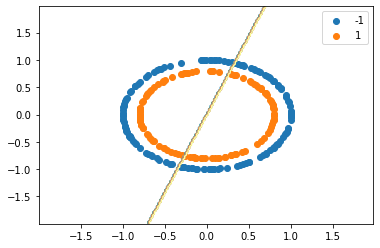

In [139]:
decision_boundary(svm, X_test, Y_test)

In [159]:
# Q. 3.4

In [165]:
X, Y = load_breast_cancer(return_X_y=True)
Y[np.where(Y==0)] = -1

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=95, random_state=1)

In [167]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=95, random_state=1)

In [168]:
svm = LinearSVM(C=2)
svm.train(X_train, Y_train, epochs=10000, lr=0.01)

Epoch No: 0, Loss: 2.0
Epoch No: 1, Loss: 3876.2540257033456
Epoch No: 2, Loss: 7731.977012907233
Epoch No: 3, Loss: 11568.219858589266
Epoch No: 4, Loss: 15384.797730106484
Epoch No: 5, Loss: 19181.53519786013
Epoch No: 6, Loss: 22958.265990926295
Epoch No: 7, Loss: 26714.832758122062
Epoch No: 8, Loss: 30451.08683439313
Epoch No: 9, Loss: 34166.88801241147
Epoch No: 10, Loss: 37862.104319273676
Epoch No: 11, Loss: 41536.611798192884
Epoch No: 12, Loss: 45190.29429507952
Epoch No: 13, Loss: 48823.04324990805
Epoch No: 14, Loss: 52434.757492769124
Epoch No: 15, Loss: 56025.34304450859
Epoch No: 16, Loss: 59594.71292185662
Epoch No: 17, Loss: 63142.78694695274
Epoch No: 18, Loss: 66669.49156117368
Epoch No: 19, Loss: 70174.75964317365
Epoch No: 20, Loss: 73658.53033104776
Epoch No: 21, Loss: 77120.74884853211
Epoch No: 22, Loss: 80561.36633515445
Epoch No: 23, Loss: 83980.33968025257
Epoch No: 24, Loss: 87377.6313607782
Epoch No: 25, Loss: 90753.2092828064
Epoch No: 26, Loss: 94107.0466

Epoch No: 500, Loss: 481479.6903916709
Epoch No: 501, Loss: 481517.9844446841
Epoch No: 502, Loss: 481555.8963974708
Epoch No: 503, Loss: 481593.4300543113
Epoch No: 504, Loss: 481630.5891817759
Epoch No: 505, Loss: 481667.37750909524
Epoch No: 506, Loss: 481703.7987285271
Epoch No: 507, Loss: 481739.8564957203
Epoch No: 508, Loss: 481775.55443007406
Epoch No: 509, Loss: 481810.8961150947
Epoch No: 510, Loss: 481845.88509874826
Epoch No: 511, Loss: 481880.5248938103
Epoch No: 512, Loss: 481914.818978212
Epoch No: 513, Loss: 481948.7707953829
Epoch No: 514, Loss: 481982.38375459047
Epoch No: 515, Loss: 482015.6612312759
Epoch No: 516, Loss: 482048.60656738805
Epoch No: 517, Loss: 482081.223071712
Epoch No: 518, Loss: 482113.5140201964
Epoch No: 519, Loss: 482145.48265627667
Epoch No: 520, Loss: 482177.13219119457
Epoch No: 521, Loss: 482208.4658043166
Epoch No: 522, Loss: 482239.4866434467
Epoch No: 523, Loss: 482270.1978251387
Epoch No: 524, Loss: 482300.60243500245
Epoch No: 525, Loss

Epoch No: 1016, Loss: 485291.84740756627
Epoch No: 1017, Loss: 485292.0621154178
Epoch No: 1018, Loss: 485292.27467621694
Epoch No: 1019, Loss: 485292.485111434
Epoch No: 1020, Loss: 485292.6934423241
Epoch No: 1021, Loss: 485292.8996899301
Epoch No: 1022, Loss: 485293.10387508426
Epoch No: 1023, Loss: 485293.30601841054
Epoch No: 1024, Loss: 485293.5061403271
Epoch No: 1025, Loss: 485293.7042610472
Epoch No: 1026, Loss: 485293.9004005825
Epoch No: 1027, Loss: 485294.09457874444
Epoch No: 1028, Loss: 485294.2868151462
Epoch No: 1029, Loss: 485294.47712920513
Epoch No: 1030, Loss: 485294.66554014414
Epoch No: 1031, Loss: 485294.85206699395
Epoch No: 1032, Loss: 485295.03672859515
Epoch No: 1033, Loss: 485295.21954359964
Epoch No: 1034, Loss: 485295.40053047345
Epoch No: 1035, Loss: 485295.5797074969
Epoch No: 1036, Loss: 485295.7570927687
Epoch No: 1037, Loss: 485295.9327042055
Epoch No: 1038, Loss: 485296.1065595456
Epoch No: 1039, Loss: 485296.2786763496
Epoch No: 1040, Loss: 485296.4

Epoch No: 1522, Loss: 485313.18550539954
Epoch No: 1523, Loss: 485313.18683359434
Epoch No: 1524, Loss: 485313.18814850703
Epoch No: 1525, Loss: 485313.1894502705
Epoch No: 1526, Loss: 485313.1907390166
Epoch No: 1527, Loss: 485313.1920148751
Epoch No: 1528, Loss: 485313.1932779749
Epoch No: 1529, Loss: 485313.19452844386
Epoch No: 1530, Loss: 485313.19576640805
Epoch No: 1531, Loss: 485313.1969919927
Epoch No: 1532, Loss: 485313.19820532145
Epoch No: 1533, Loss: 485313.19940651685
Epoch No: 1534, Loss: 485313.2005957005
Epoch No: 1535, Loss: 485313.2017729921
Epoch No: 1536, Loss: 485313.20293851086
Epoch No: 1537, Loss: 485313.20409237454
Epoch No: 1538, Loss: 485313.2052346994
Epoch No: 1539, Loss: 485313.20636560104
Epoch No: 1540, Loss: 485313.20748519374
Epoch No: 1541, Loss: 485313.20859359053
Epoch No: 1542, Loss: 485313.2096909034
Epoch No: 1543, Loss: 485313.21077724296
Epoch No: 1544, Loss: 485313.2118527193
Epoch No: 1545, Loss: 485313.2129174407
Epoch No: 1546, Loss: 48531

Epoch No: 2035, Loss: 485313.31755906896
Epoch No: 2036, Loss: 485313.31756672694
Epoch No: 2037, Loss: 485313.3175743084
Epoch No: 2038, Loss: 485313.317581814
Epoch No: 2039, Loss: 485313.31758924463
Epoch No: 2040, Loss: 485313.317596601
Epoch No: 2041, Loss: 485313.3176038837
Epoch No: 2042, Loss: 485313.3176110935
Epoch No: 2043, Loss: 485313.3176182313
Epoch No: 2044, Loss: 485313.31762529764
Epoch No: 2045, Loss: 485313.31763229345
Epoch No: 2046, Loss: 485313.3176392192
Epoch No: 2047, Loss: 485313.3176460758
Epoch No: 2048, Loss: 485313.3176528637
Epoch No: 2049, Loss: 485313.31765958376
Epoch No: 2050, Loss: 485313.31766623666
Epoch No: 2051, Loss: 485313.317672823
Epoch No: 2052, Loss: 485313.3176793435
Epoch No: 2053, Loss: 485313.31768579886
Epoch No: 2054, Loss: 485313.31769218954
Epoch No: 2055, Loss: 485313.3176985163
Epoch No: 2056, Loss: 485313.3177047799
Epoch No: 2057, Loss: 485313.31771098083
Epoch No: 2058, Loss: 485313.31771711976
Epoch No: 2059, Loss: 485313.317

Epoch No: 2543, Loss: 485313.3183202288
Epoch No: 2544, Loss: 485313.3183202753
Epoch No: 2545, Loss: 485313.31832032115
Epoch No: 2546, Loss: 485313.3183203666
Epoch No: 2547, Loss: 485313.3183204116
Epoch No: 2548, Loss: 485313.3183204563
Epoch No: 2549, Loss: 485313.3183205005
Epoch No: 2550, Loss: 485313.3183205441
Epoch No: 2551, Loss: 485313.3183205874
Epoch No: 2552, Loss: 485313.3183206303
Epoch No: 2553, Loss: 485313.3183206726
Epoch No: 2554, Loss: 485313.31832071464
Epoch No: 2555, Loss: 485313.3183207562
Epoch No: 2556, Loss: 485313.3183207974
Epoch No: 2557, Loss: 485313.31832083815
Epoch No: 2558, Loss: 485313.3183208785
Epoch No: 2559, Loss: 485313.3183209184
Epoch No: 2560, Loss: 485313.3183209578
Epoch No: 2561, Loss: 485313.31832099706
Epoch No: 2562, Loss: 485313.3183210357
Epoch No: 2563, Loss: 485313.3183210741
Epoch No: 2564, Loss: 485313.31832111214
Epoch No: 2565, Loss: 485313.3183211497
Epoch No: 2566, Loss: 485313.31832118693
Epoch No: 2567, Loss: 485313.31832

Epoch No: 3043, Loss: 485313.31832484086
Epoch No: 3044, Loss: 485313.3183248412
Epoch No: 3045, Loss: 485313.31832484156
Epoch No: 3046, Loss: 485313.31832484185
Epoch No: 3047, Loss: 485313.3183248422
Epoch No: 3048, Loss: 485313.31832484255
Epoch No: 3049, Loss: 485313.31832484284
Epoch No: 3050, Loss: 485313.318324843
Epoch No: 3051, Loss: 485313.3183248433
Epoch No: 3052, Loss: 485313.3183248436
Epoch No: 3053, Loss: 485313.3183248439
Epoch No: 3054, Loss: 485313.3183248441
Epoch No: 3055, Loss: 485313.31832484435
Epoch No: 3056, Loss: 485313.3183248446
Epoch No: 3057, Loss: 485313.3183248449
Epoch No: 3058, Loss: 485313.31832484517
Epoch No: 3059, Loss: 485313.31832484534
Epoch No: 3060, Loss: 485313.31832484563
Epoch No: 3061, Loss: 485313.31832484587
Epoch No: 3062, Loss: 485313.31832484616
Epoch No: 3063, Loss: 485313.31832484633
Epoch No: 3064, Loss: 485313.3183248466
Epoch No: 3065, Loss: 485313.31832484686
Epoch No: 3066, Loss: 485313.31832484703
Epoch No: 3067, Loss: 48531

Epoch No: 3543, Loss: 485313.3183248673
Epoch No: 3544, Loss: 485313.3183248673
Epoch No: 3545, Loss: 485313.3183248673
Epoch No: 3546, Loss: 485313.3183248673
Epoch No: 3547, Loss: 485313.3183248673
Epoch No: 3548, Loss: 485313.3183248673
Epoch No: 3549, Loss: 485313.3183248673
Epoch No: 3550, Loss: 485313.3183248673
Epoch No: 3551, Loss: 485313.3183248673
Epoch No: 3552, Loss: 485313.3183248673
Epoch No: 3553, Loss: 485313.3183248673
Epoch No: 3554, Loss: 485313.3183248673
Epoch No: 3555, Loss: 485313.3183248673
Epoch No: 3556, Loss: 485313.3183248673
Epoch No: 3557, Loss: 485313.3183248673
Epoch No: 3558, Loss: 485313.3183248673
Epoch No: 3559, Loss: 485313.3183248673
Epoch No: 3560, Loss: 485313.3183248673
Epoch No: 3561, Loss: 485313.3183248673
Epoch No: 3562, Loss: 485313.3183248673
Epoch No: 3563, Loss: 485313.3183248673
Epoch No: 3564, Loss: 485313.3183248673
Epoch No: 3565, Loss: 485313.3183248673
Epoch No: 3566, Loss: 485313.3183248673
Epoch No: 3567, Loss: 485313.3183248673


Epoch No: 4066, Loss: 485313.3183248673
Epoch No: 4067, Loss: 485313.3183248673
Epoch No: 4068, Loss: 485313.3183248673
Epoch No: 4069, Loss: 485313.3183248673
Epoch No: 4070, Loss: 485313.3183248673
Epoch No: 4071, Loss: 485313.3183248673
Epoch No: 4072, Loss: 485313.3183248673
Epoch No: 4073, Loss: 485313.3183248673
Epoch No: 4074, Loss: 485313.3183248673
Epoch No: 4075, Loss: 485313.3183248673
Epoch No: 4076, Loss: 485313.3183248673
Epoch No: 4077, Loss: 485313.3183248673
Epoch No: 4078, Loss: 485313.3183248673
Epoch No: 4079, Loss: 485313.3183248673
Epoch No: 4080, Loss: 485313.3183248673
Epoch No: 4081, Loss: 485313.3183248673
Epoch No: 4082, Loss: 485313.3183248673
Epoch No: 4083, Loss: 485313.3183248673
Epoch No: 4084, Loss: 485313.3183248673
Epoch No: 4085, Loss: 485313.3183248673
Epoch No: 4086, Loss: 485313.3183248673
Epoch No: 4087, Loss: 485313.3183248673
Epoch No: 4088, Loss: 485313.3183248673
Epoch No: 4089, Loss: 485313.3183248673
Epoch No: 4090, Loss: 485313.3183248673


Epoch No: 4584, Loss: 485313.3183248673
Epoch No: 4585, Loss: 485313.3183248673
Epoch No: 4586, Loss: 485313.3183248673
Epoch No: 4587, Loss: 485313.3183248673
Epoch No: 4588, Loss: 485313.3183248673
Epoch No: 4589, Loss: 485313.3183248673
Epoch No: 4590, Loss: 485313.3183248673
Epoch No: 4591, Loss: 485313.3183248673
Epoch No: 4592, Loss: 485313.3183248673
Epoch No: 4593, Loss: 485313.3183248673
Epoch No: 4594, Loss: 485313.3183248673
Epoch No: 4595, Loss: 485313.3183248673
Epoch No: 4596, Loss: 485313.3183248673
Epoch No: 4597, Loss: 485313.3183248673
Epoch No: 4598, Loss: 485313.3183248673
Epoch No: 4599, Loss: 485313.3183248673
Epoch No: 4600, Loss: 485313.3183248673
Epoch No: 4601, Loss: 485313.3183248673
Epoch No: 4602, Loss: 485313.3183248673
Epoch No: 4603, Loss: 485313.3183248673
Epoch No: 4604, Loss: 485313.3183248673
Epoch No: 4605, Loss: 485313.3183248673
Epoch No: 4606, Loss: 485313.3183248673
Epoch No: 4607, Loss: 485313.3183248673
Epoch No: 4608, Loss: 485313.3183248673


Epoch No: 5098, Loss: 485313.3183248673
Epoch No: 5099, Loss: 485313.3183248673
Epoch No: 5100, Loss: 485313.3183248673
Epoch No: 5101, Loss: 485313.3183248673
Epoch No: 5102, Loss: 485313.3183248673
Epoch No: 5103, Loss: 485313.3183248673
Epoch No: 5104, Loss: 485313.3183248673
Epoch No: 5105, Loss: 485313.3183248673
Epoch No: 5106, Loss: 485313.3183248673
Epoch No: 5107, Loss: 485313.3183248673
Epoch No: 5108, Loss: 485313.3183248673
Epoch No: 5109, Loss: 485313.3183248673
Epoch No: 5110, Loss: 485313.3183248673
Epoch No: 5111, Loss: 485313.3183248673
Epoch No: 5112, Loss: 485313.3183248673
Epoch No: 5113, Loss: 485313.3183248673
Epoch No: 5114, Loss: 485313.3183248673
Epoch No: 5115, Loss: 485313.3183248673
Epoch No: 5116, Loss: 485313.3183248673
Epoch No: 5117, Loss: 485313.3183248673
Epoch No: 5118, Loss: 485313.3183248673
Epoch No: 5119, Loss: 485313.3183248673
Epoch No: 5120, Loss: 485313.3183248673
Epoch No: 5121, Loss: 485313.3183248673
Epoch No: 5122, Loss: 485313.3183248673


Epoch No: 5630, Loss: 485313.3183248673
Epoch No: 5631, Loss: 485313.3183248673
Epoch No: 5632, Loss: 485313.3183248673
Epoch No: 5633, Loss: 485313.3183248673
Epoch No: 5634, Loss: 485313.3183248673
Epoch No: 5635, Loss: 485313.3183248673
Epoch No: 5636, Loss: 485313.3183248673
Epoch No: 5637, Loss: 485313.3183248673
Epoch No: 5638, Loss: 485313.3183248673
Epoch No: 5639, Loss: 485313.3183248673
Epoch No: 5640, Loss: 485313.3183248673
Epoch No: 5641, Loss: 485313.3183248673
Epoch No: 5642, Loss: 485313.3183248673
Epoch No: 5643, Loss: 485313.3183248673
Epoch No: 5644, Loss: 485313.3183248673
Epoch No: 5645, Loss: 485313.3183248673
Epoch No: 5646, Loss: 485313.3183248673
Epoch No: 5647, Loss: 485313.3183248673
Epoch No: 5648, Loss: 485313.3183248673
Epoch No: 5649, Loss: 485313.3183248673
Epoch No: 5650, Loss: 485313.3183248673
Epoch No: 5651, Loss: 485313.3183248673
Epoch No: 5652, Loss: 485313.3183248673
Epoch No: 5653, Loss: 485313.3183248673
Epoch No: 5654, Loss: 485313.3183248673


Epoch No: 6168, Loss: 485313.3183248673
Epoch No: 6169, Loss: 485313.3183248673
Epoch No: 6170, Loss: 485313.3183248673
Epoch No: 6171, Loss: 485313.3183248673
Epoch No: 6172, Loss: 485313.3183248673
Epoch No: 6173, Loss: 485313.3183248673
Epoch No: 6174, Loss: 485313.3183248673
Epoch No: 6175, Loss: 485313.3183248673
Epoch No: 6176, Loss: 485313.3183248673
Epoch No: 6177, Loss: 485313.3183248673
Epoch No: 6178, Loss: 485313.3183248673
Epoch No: 6179, Loss: 485313.3183248673
Epoch No: 6180, Loss: 485313.3183248673
Epoch No: 6181, Loss: 485313.3183248673
Epoch No: 6182, Loss: 485313.3183248673
Epoch No: 6183, Loss: 485313.3183248673
Epoch No: 6184, Loss: 485313.3183248673
Epoch No: 6185, Loss: 485313.3183248673
Epoch No: 6186, Loss: 485313.3183248673
Epoch No: 6187, Loss: 485313.3183248673
Epoch No: 6188, Loss: 485313.3183248673
Epoch No: 6189, Loss: 485313.3183248673
Epoch No: 6190, Loss: 485313.3183248673
Epoch No: 6191, Loss: 485313.3183248673
Epoch No: 6192, Loss: 485313.3183248673


Epoch No: 6660, Loss: 485313.3183248673
Epoch No: 6661, Loss: 485313.3183248673
Epoch No: 6662, Loss: 485313.3183248673
Epoch No: 6663, Loss: 485313.3183248673
Epoch No: 6664, Loss: 485313.3183248673
Epoch No: 6665, Loss: 485313.3183248673
Epoch No: 6666, Loss: 485313.3183248673
Epoch No: 6667, Loss: 485313.3183248673
Epoch No: 6668, Loss: 485313.3183248673
Epoch No: 6669, Loss: 485313.3183248673
Epoch No: 6670, Loss: 485313.3183248673
Epoch No: 6671, Loss: 485313.3183248673
Epoch No: 6672, Loss: 485313.3183248673
Epoch No: 6673, Loss: 485313.3183248673
Epoch No: 6674, Loss: 485313.3183248673
Epoch No: 6675, Loss: 485313.3183248673
Epoch No: 6676, Loss: 485313.3183248673
Epoch No: 6677, Loss: 485313.3183248673
Epoch No: 6678, Loss: 485313.3183248673
Epoch No: 6679, Loss: 485313.3183248673
Epoch No: 6680, Loss: 485313.3183248673
Epoch No: 6681, Loss: 485313.3183248673
Epoch No: 6682, Loss: 485313.3183248673
Epoch No: 6683, Loss: 485313.3183248673
Epoch No: 6684, Loss: 485313.3183248673


Epoch No: 7165, Loss: 485313.3183248673
Epoch No: 7166, Loss: 485313.3183248673
Epoch No: 7167, Loss: 485313.3183248673
Epoch No: 7168, Loss: 485313.3183248673
Epoch No: 7169, Loss: 485313.3183248673
Epoch No: 7170, Loss: 485313.3183248673
Epoch No: 7171, Loss: 485313.3183248673
Epoch No: 7172, Loss: 485313.3183248673
Epoch No: 7173, Loss: 485313.3183248673
Epoch No: 7174, Loss: 485313.3183248673
Epoch No: 7175, Loss: 485313.3183248673
Epoch No: 7176, Loss: 485313.3183248673
Epoch No: 7177, Loss: 485313.3183248673
Epoch No: 7178, Loss: 485313.3183248673
Epoch No: 7179, Loss: 485313.3183248673
Epoch No: 7180, Loss: 485313.3183248673
Epoch No: 7181, Loss: 485313.3183248673
Epoch No: 7182, Loss: 485313.3183248673
Epoch No: 7183, Loss: 485313.3183248673
Epoch No: 7184, Loss: 485313.3183248673
Epoch No: 7185, Loss: 485313.3183248673
Epoch No: 7186, Loss: 485313.3183248673
Epoch No: 7187, Loss: 485313.3183248673
Epoch No: 7188, Loss: 485313.3183248673
Epoch No: 7189, Loss: 485313.3183248673


Epoch No: 7667, Loss: 485313.3183248673
Epoch No: 7668, Loss: 485313.3183248673
Epoch No: 7669, Loss: 485313.3183248673
Epoch No: 7670, Loss: 485313.3183248673
Epoch No: 7671, Loss: 485313.3183248673
Epoch No: 7672, Loss: 485313.3183248673
Epoch No: 7673, Loss: 485313.3183248673
Epoch No: 7674, Loss: 485313.3183248673
Epoch No: 7675, Loss: 485313.3183248673
Epoch No: 7676, Loss: 485313.3183248673
Epoch No: 7677, Loss: 485313.3183248673
Epoch No: 7678, Loss: 485313.3183248673
Epoch No: 7679, Loss: 485313.3183248673
Epoch No: 7680, Loss: 485313.3183248673
Epoch No: 7681, Loss: 485313.3183248673
Epoch No: 7682, Loss: 485313.3183248673
Epoch No: 7683, Loss: 485313.3183248673
Epoch No: 7684, Loss: 485313.3183248673
Epoch No: 7685, Loss: 485313.3183248673
Epoch No: 7686, Loss: 485313.3183248673
Epoch No: 7687, Loss: 485313.3183248673
Epoch No: 7688, Loss: 485313.3183248673
Epoch No: 7689, Loss: 485313.3183248673
Epoch No: 7690, Loss: 485313.3183248673
Epoch No: 7691, Loss: 485313.3183248673


Epoch No: 8167, Loss: 485313.3183248673
Epoch No: 8168, Loss: 485313.3183248673
Epoch No: 8169, Loss: 485313.3183248673
Epoch No: 8170, Loss: 485313.3183248673
Epoch No: 8171, Loss: 485313.3183248673
Epoch No: 8172, Loss: 485313.3183248673
Epoch No: 8173, Loss: 485313.3183248673
Epoch No: 8174, Loss: 485313.3183248673
Epoch No: 8175, Loss: 485313.3183248673
Epoch No: 8176, Loss: 485313.3183248673
Epoch No: 8177, Loss: 485313.3183248673
Epoch No: 8178, Loss: 485313.3183248673
Epoch No: 8179, Loss: 485313.3183248673
Epoch No: 8180, Loss: 485313.3183248673
Epoch No: 8181, Loss: 485313.3183248673
Epoch No: 8182, Loss: 485313.3183248673
Epoch No: 8183, Loss: 485313.3183248673
Epoch No: 8184, Loss: 485313.3183248673
Epoch No: 8185, Loss: 485313.3183248673
Epoch No: 8186, Loss: 485313.3183248673
Epoch No: 8187, Loss: 485313.3183248673
Epoch No: 8188, Loss: 485313.3183248673
Epoch No: 8189, Loss: 485313.3183248673
Epoch No: 8190, Loss: 485313.3183248673
Epoch No: 8191, Loss: 485313.3183248673


Epoch No: 8667, Loss: 485313.3183248673
Epoch No: 8668, Loss: 485313.3183248673
Epoch No: 8669, Loss: 485313.3183248673
Epoch No: 8670, Loss: 485313.3183248673
Epoch No: 8671, Loss: 485313.3183248673
Epoch No: 8672, Loss: 485313.3183248673
Epoch No: 8673, Loss: 485313.3183248673
Epoch No: 8674, Loss: 485313.3183248673
Epoch No: 8675, Loss: 485313.3183248673
Epoch No: 8676, Loss: 485313.3183248673
Epoch No: 8677, Loss: 485313.3183248673
Epoch No: 8678, Loss: 485313.3183248673
Epoch No: 8679, Loss: 485313.3183248673
Epoch No: 8680, Loss: 485313.3183248673
Epoch No: 8681, Loss: 485313.3183248673
Epoch No: 8682, Loss: 485313.3183248673
Epoch No: 8683, Loss: 485313.3183248673
Epoch No: 8684, Loss: 485313.3183248673
Epoch No: 8685, Loss: 485313.3183248673
Epoch No: 8686, Loss: 485313.3183248673
Epoch No: 8687, Loss: 485313.3183248673
Epoch No: 8688, Loss: 485313.3183248673
Epoch No: 8689, Loss: 485313.3183248673
Epoch No: 8690, Loss: 485313.3183248673
Epoch No: 8691, Loss: 485313.3183248673


Epoch No: 9168, Loss: 485313.3183248673
Epoch No: 9169, Loss: 485313.3183248673
Epoch No: 9170, Loss: 485313.3183248673
Epoch No: 9171, Loss: 485313.3183248673
Epoch No: 9172, Loss: 485313.3183248673
Epoch No: 9173, Loss: 485313.3183248673
Epoch No: 9174, Loss: 485313.3183248673
Epoch No: 9175, Loss: 485313.3183248673
Epoch No: 9176, Loss: 485313.3183248673
Epoch No: 9177, Loss: 485313.3183248673
Epoch No: 9178, Loss: 485313.3183248673
Epoch No: 9179, Loss: 485313.3183248673
Epoch No: 9180, Loss: 485313.3183248673
Epoch No: 9181, Loss: 485313.3183248673
Epoch No: 9182, Loss: 485313.3183248673
Epoch No: 9183, Loss: 485313.3183248673
Epoch No: 9184, Loss: 485313.3183248673
Epoch No: 9185, Loss: 485313.3183248673
Epoch No: 9186, Loss: 485313.3183248673
Epoch No: 9187, Loss: 485313.3183248673
Epoch No: 9188, Loss: 485313.3183248673
Epoch No: 9189, Loss: 485313.3183248673
Epoch No: 9190, Loss: 485313.3183248673
Epoch No: 9191, Loss: 485313.3183248673
Epoch No: 9192, Loss: 485313.3183248673


Epoch No: 9661, Loss: 485313.3183248673
Epoch No: 9662, Loss: 485313.3183248673
Epoch No: 9663, Loss: 485313.3183248673
Epoch No: 9664, Loss: 485313.3183248673
Epoch No: 9665, Loss: 485313.3183248673
Epoch No: 9666, Loss: 485313.3183248673
Epoch No: 9667, Loss: 485313.3183248673
Epoch No: 9668, Loss: 485313.3183248673
Epoch No: 9669, Loss: 485313.3183248673
Epoch No: 9670, Loss: 485313.3183248673
Epoch No: 9671, Loss: 485313.3183248673
Epoch No: 9672, Loss: 485313.3183248673
Epoch No: 9673, Loss: 485313.3183248673
Epoch No: 9674, Loss: 485313.3183248673
Epoch No: 9675, Loss: 485313.3183248673
Epoch No: 9676, Loss: 485313.3183248673
Epoch No: 9677, Loss: 485313.3183248673
Epoch No: 9678, Loss: 485313.3183248673
Epoch No: 9679, Loss: 485313.3183248673
Epoch No: 9680, Loss: 485313.3183248673
Epoch No: 9681, Loss: 485313.3183248673
Epoch No: 9682, Loss: 485313.3183248673
Epoch No: 9683, Loss: 485313.3183248673
Epoch No: 9684, Loss: 485313.3183248673
Epoch No: 9685, Loss: 485313.3183248673


In [169]:
# Linear SVM on Breat Cancer Dataset
# Accuracy = 40%, epochs = 10000, lr=0.01, C=2
svm.evaluate(X_test, Y_test)

0.4